In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [36]:
# Set the random seed for reproducibility
torch.manual_seed(0)

# Pick our number of training and test samples
num_train = 5000
num_test = 2000

# Get some random training points
train_data = (3 * torch.pi) * (2 * torch.rand(num_train, 1) - 1)
test_data = (10 * torch.pi) * (2 * torch.rand(num_test, 1) - 1)

# Compute our random target points
train_target = torch.sin(train_data)
test_target = torch.sin(test_data)
# Add some noise to the target
train_target_noisy = train_target + torch.randn(num_train, 1) * 0.1
test_target_noisy = test_target + torch.randn(num_test, 1) * 0.1

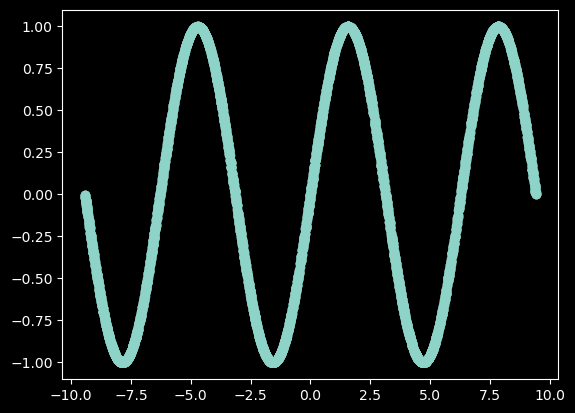

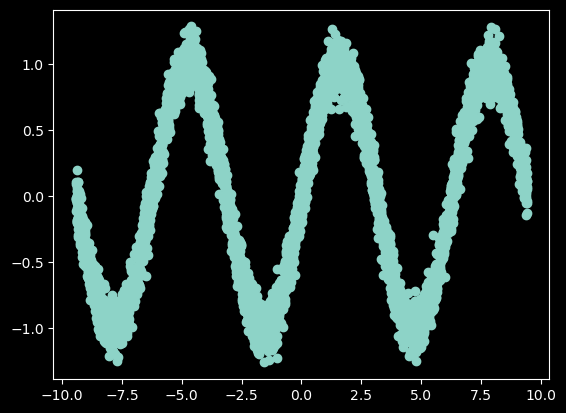

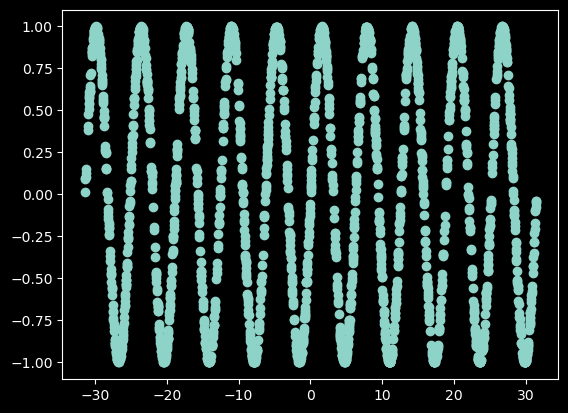

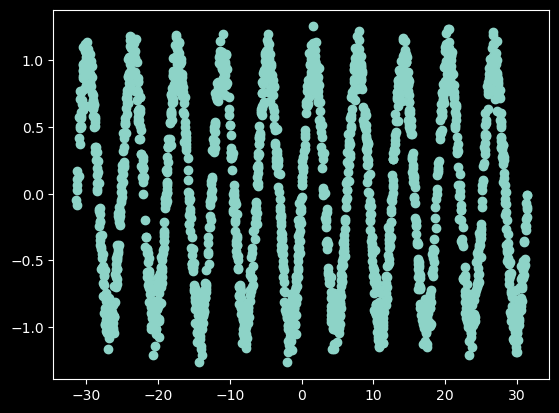

In [37]:
#plot to see what they look like
plt.scatter(train_data,train_target)
plt.show()
plt.scatter(train_data,train_target_noisy)
plt.show()
plt.scatter(test_data,test_target)
plt.show()
plt.scatter(test_data,test_target_noisy)
plt.show()

In [38]:
class simpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_hidden_layers, output_size):
        super(simpleMLP, self).__init__()
        layers = [nn.Linear(input_size, hidden_size), nn.Sigmoid()]
        for _ in range(num_hidden_layers-1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(hidden_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x= x + self.model(x)
        return x

In [39]:
model = simpleMLP(input_size=1, hidden_size=32, num_hidden_layers=2, output_size=1)

# Define our loss function
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

# Train the model
num_epochs = 25000
for epoch in range(num_epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(train_data)
    loss = loss_fn(outputs, train_target)

    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

Epoch 0/25000, Loss: 27.94260025024414
Epoch 1000/25000, Loss: 2.9199724197387695
Epoch 2000/25000, Loss: 1.0009357929229736
Epoch 3000/25000, Loss: 0.41313084959983826
Epoch 4000/25000, Loss: 0.2858240306377411
Epoch 5000/25000, Loss: 0.23543928563594818
Epoch 6000/25000, Loss: 0.20057640969753265
Epoch 7000/25000, Loss: 0.1633473038673401
Epoch 8000/25000, Loss: 0.12863391637802124
Epoch 9000/25000, Loss: 0.09671235829591751
Epoch 10000/25000, Loss: 0.061490532010793686
Epoch 11000/25000, Loss: 0.028672274202108383
Epoch 12000/25000, Loss: 0.010186882689595222
Epoch 13000/25000, Loss: 0.0030883471481502056
Epoch 14000/25000, Loss: 0.0012940197484567761
Epoch 15000/25000, Loss: 0.0006964580388739705
Epoch 16000/25000, Loss: 0.0004062518710270524
Epoch 17000/25000, Loss: 0.00027174741262570024
Epoch 18000/25000, Loss: 0.00020503131963778287
Epoch 19000/25000, Loss: 0.0001585236459504813
Epoch 20000/25000, Loss: 0.00012346284347586334
Epoch 21000/25000, Loss: 9.812266944209114e-05
Epoch

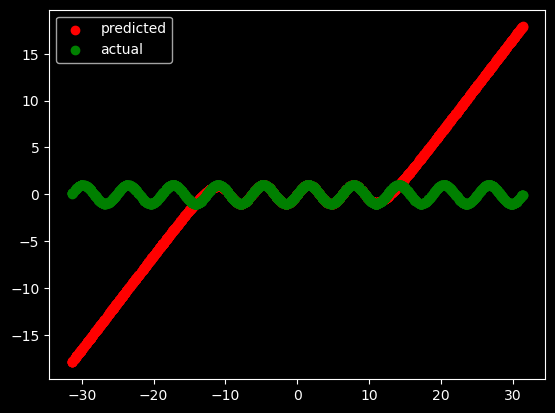

In [40]:
# visualize the results
with torch.no_grad():
    y_pred = model(test_data)
    plt.scatter(test_data, y_pred, label = "predicted", color = "red")
    plt.scatter(test_data, test_target, label = "actual", color = "green")
    plt.legend()
    plt.show()